In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot as plt
x = pd.Series(np.linspace(0,50,26)**2 -1 , index =  np.linspace(0,50,26))
x[x.index%3 == 0] = 0
x

0.0        0.0
2.0        3.0
4.0       15.0
6.0        0.0
8.0       63.0
10.0      99.0
12.0       0.0
14.0     195.0
16.0     255.0
18.0       0.0
20.0     399.0
22.0     483.0
24.0       0.0
26.0     675.0
28.0     783.0
30.0       0.0
32.0    1023.0
34.0    1155.0
36.0       0.0
38.0    1443.0
40.0    1599.0
42.0       0.0
44.0    1935.0
46.0    2115.0
48.0       0.0
50.0    2499.0
dtype: float64

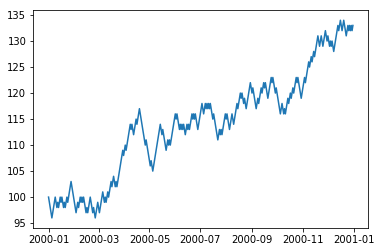

In [100]:
def problem_2(p,d=100 ):
    dat = pd.date_range("1/1/2000","12/31/2000",freq ='D')
    bern = pd.Series(np.random.binomial(1, p, size=len(dat)) , index =dat )
    bern[0] =d
    for i in range(1,len(dat)):
        if bern[i] == 0:
            bern[i] = bern[i-1]-1
        else:
            bern[i] = bern[i-1]+1
    bern[bern<0] = 0
    plt.plot(dat,bern)
    

# problem_2(0.2)
# problem_2(0.5)
# problem_2(0.9)
problem_2(0.5)
# problem_2(0.1)
# problem_2(0.9)



In [128]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major })

studentInfo[(studentInfo['Age'] >19) & (studentInfo['Sex'] == "M" ) ][['ID','Name']]

,ID,Name
0,0,Mylan
6,6,Matt


In [131]:
XCVB =  pd.merge(studentInfo,otherInfo, on ='ID')[['ID','Age','GPA']]
XCVB

,ID,Age,GPA
0,0,20,3.8
1,1,21,3.5
2,2,18,3.0
3,3,22,3.9
4,4,19,2.8
5,5,20,2.9
6,6,20,3.8
7,7,19,3.4
8,8,20,3.7


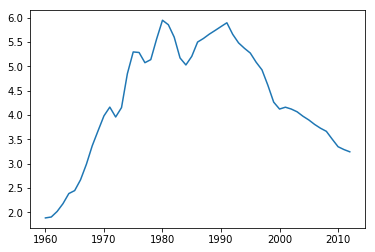

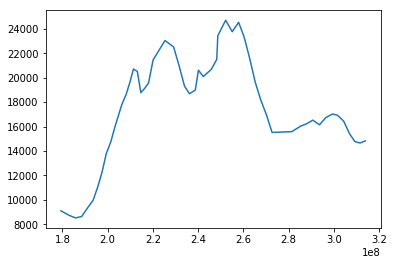

In [245]:
m = pd.read_csv("crime_data.txt", skiprows = 1)
m['Crime-Rate'] = m.Total/m.Population*100
a = m.loc[:,'Year']
b = m.loc[:,'Crime-Rate']
plt.plot(a,b)
plt.show()
n = m.sort_values('Crime-Rate', ascending = False)
years = n.iloc[:5,0]
years
mean_t = np.mean(m.loc[:,'Total'])
mean_bur = np.mean(m.loc[:,'Burglary'])
m[(m['Total'] < mean_t) & (m['Burglary'] > mean_bur ) ][['Year']]
plt.plot(m.loc[:,'Population'],m.loc[:,'Murder'])

n = m[(m['Year'] >= 1980) & (m['Year'] < 1989) ][['Year','Population','Violent','Robbery']]
n.to_csv("Crimes_Subset.csv")

In [3]:
A=pd.read_csv('titanic.csv', header=0)
B=A.drop(['Sibsp', 'Parch', 'Cabin', 'Boat', 'Body', 'home.dest'], axis=1)
B=B.dropna(subset=['Survived'])
avgage=np.mean(B['Age'])
B['Age']=B['Age'].fillna(avgage)
B.to_csv('titanic_clean.csv')
survivors= np.sum(B['Survived'])
print('Number of survivors are: ', survivors)
percent_survivors=survivors/int(len(B.index))
print('Percentage of survivors are: ', percent_survivors*100)
ticketprice= np.sum(B['Fare'])/int(len(B.index))
print('Average ticket price is: ', ticketprice)
ticketmax= np.max(B['Fare'])
print('The most expensive ticket cost: ', ticketmax)
oldestsurvivor = np.max(B[B['Survived']==1]['Age'])
print('oldest survivor is: ', oldestsurvivor)
youngestsurvivor = np.min(B[B['Survived']==1]['Age'])
print('youngest survivor is: ', youngestsurvivor)
olddeath=np.max(B[B['Survived']==0]['Age'])
print('Oldest death age: ', olddeath)
youngdeath=np.min(B[B['Survived']==0]['Age'])
print('Youngest death age: ', youngdeath)


Number of survivors are:  500.0
Percentage of survivors are:  38.19709702062643
Average ticket price is:  33.270043468296414
The most expensive ticket cost:  512.3292
oldest survivor is:  80.0
youngest survivor is:  0.1667
Oldest death age:  74.0
Youngest death age:  0.3333


In [246]:
from pydataset import data
titanic = data("Titanic")
titanic

initiated datasets repo at: C:\Users\ministry of finance\.pydataset/


,Class,Sex,Age,Survived,Freq
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0
6,2nd,Female,Child,No,0
7,3rd,Female,Child,No,17
8,Crew,Female,Child,No,0
9,1st,Male,Adult,No,118
10,2nd,Male,Adult,No,154


Text(0.5,1,'Plague Deaths over time')

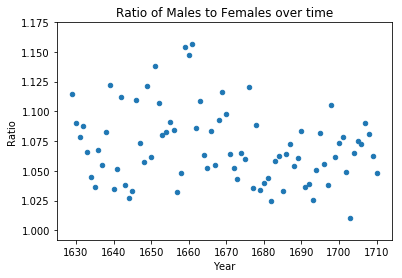

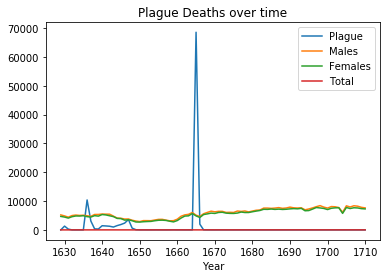

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data
import numpy as np

data=data('Arbuthnot')
data.plot(kind="scatter",x='Year', y='Ratio')
plt.title('Ratio of Males to Females over time')
data.plot(kind='line', x='Year', y=['Plague', 'Males', 'Females', 'Total'])
plt.title('Plague Deaths over time')

   Girth  Height  Volume
1    8.3      70    10.3
2    8.6      65    10.3
3    8.8      63    10.2
4   10.5      72    16.4
5   10.7      81    18.8


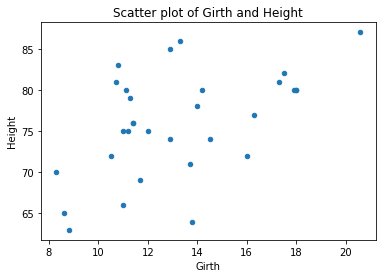

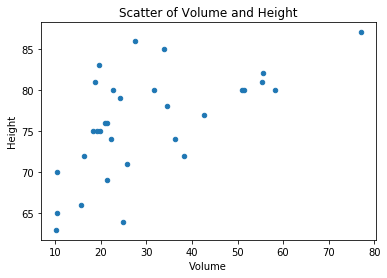

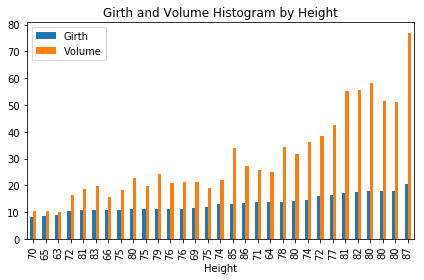

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data
import numpy as np

data=data('trees')
print(data.head())
data.plot(kind="scatter", x='Girth', y='Height')
plt.title('Scatter plot of Girth and Height')
data.plot(kind="scatter",x='Volume', y='Height')
plt.title('Scatter of Volume and Height')
data.plot(kind="bar",x='Height')
plt.title('Girth and Volume Histogram by Height')
plt.tight_layout()

       deaths  drivers  popden  rural  temp   fuel
Louis    1037      146    72.0   40.0    65  109.0


Text(0.5,1,'Deaths vs Rural Areas')

<Figure size 432x432 with 0 Axes>

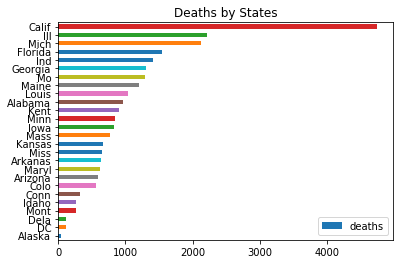

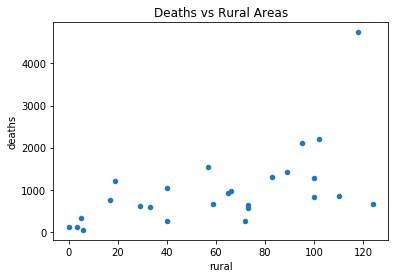

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data
import numpy as np

data=data('road')
data =data.sort_values(by ='deaths')
print(data.sample())
plt.figure(figsize=(6,6))
plt.tight_layout()
data.plot(kind="barh", y='deaths')
plt.title('Deaths by States')

data.plot(kind="scatter", x='rural', y='deaths')
plt.title('Deaths vs Rural Areas')

     duration  delta  race  poverty  smoke  alcohol  agemth  ybirth  yschool  \
47          2      1     1        1      1        0      21      81       12   
570        16      1     3        1      0        0      23      83        6   
607         2      1     3        0      0        0      19      79       11   
668         5      1     3        1      0        0      20      81       12   
223         1      1     1        0      0        0      24      83       13   

     pc3mth  
47        1  
570       0  
607       0  
668       0  
223       0  


<Figure size 432x432 with 0 Axes>

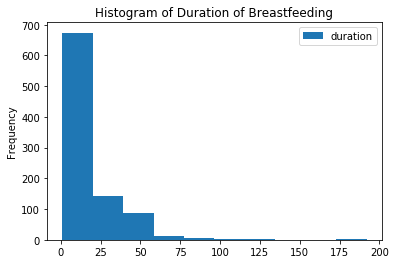

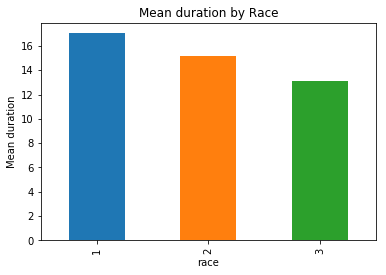

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data
import numpy as np

data=data('bfeed')
print(data.sample(5))

plt.figure(figsize=(6,6))
plt.tight_layout()

data.plot(kind="hist", y='duration')
plt.title('Histogram of Duration of Breastfeeding')
plt.show()
A=data.groupby('race').mean()['duration']
A.plot(kind='bar', title="Mean duration by Race")
plt.ylabel('Mean duration')
plt.show()

     start    stop  event       age      year  surgery  transplant   id  \
171    0.0    11.0      0 -7.608487  6.472279        0           0  102   
83    32.0   285.0      1  0.733744  3.477070        0           1   51   
67    58.0  1322.0      0 -2.696783  2.882957        1           1   41   
55     0.0    12.0      1 -4.533881  2.308008        0           0   35   
43     0.0    71.0      0  6.023272  1.683778        0           0   28   

     duration  
171      11.0  
83      253.0  
67     1264.0  
55       12.0  
43       71.0  


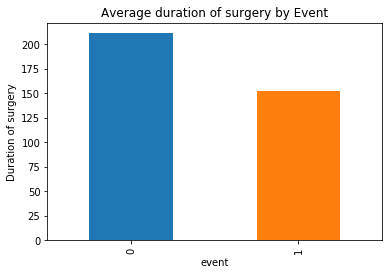

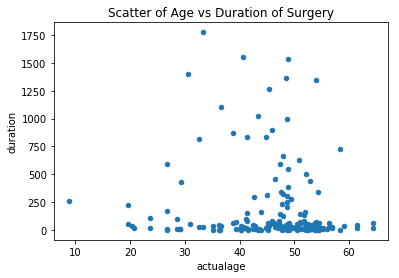

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data
import numpy as np
data('heart')
A=data('heart')
A['duration']=A['stop']-A['start']
print(A.sample((5)))
B=A.groupby('event').mean()['duration']
B.plot(kind='bar', title='Average duration of surgery by Event')
plt.ylabel('Duration of surgery')
A['actualage']=A['age']+48
A.plot(kind='scatter', x='actualage',y='duration')
plt.title("Scatter of Age vs Duration of Surgery")
plt.show()
